In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 데이터 로드

In [2]:
data = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv")
data

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
data.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
df = data.iloc[:,1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 🕹️ Data Description
1. Name : 게임의 이름  
2. Platform : 게임이 플랫폼의 이름  
3. Year : 게임이 출시된 연도  
4. Genre : 게임의 장르  
5. Publisher : 게임 제작 회사  
6. NA_Sales : 북미지역에서의 출고량  
7. EU_Sales : 유럽지역에서의 출고량  
8. JP_Sales : 일본지역에서의 출고량  
9. Other_Sales : 기타지역에서의 출고량


# EDA

In [6]:
df.shape # 9개의 변수로 이루어진 16,598개의 게임 데이터

(16598, 9)

In [7]:
# 컬럼 명
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [8]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [9]:
len(df['Genre'].unique()) # 12 장르

13

In [10]:
# 플렛폼의 종류
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
len(df['Platform'].unique()) # 31개의 플렛폼

31

In [13]:
len(df['Publisher'].unique()) # 575개의 회사

579

In [14]:
len(df['Name'].unique()) 

11493

In [17]:
df['Platform'][df['Publisher'] == 'Nintendo'].unique() # 닌텐도 회사가 발매한 게임의 플랫폼 게임기--스위치는 없나? 연도가 언제까지인지 확인해봐야 겠다. 

array(['3DS', 'DS', 'N64', 'NES', 'GBA', 'WiiU', 'SNES', 'Wii', 'GB',
       'GC'], dtype=object)

> 범주형 데이터 : Name/Platform/Genre/Publisher( 이름/플랫폼/장르/회사 ) 

> 연속형 데이터 : Year/NA_Sales/EU_Sales/JP_Sales/Other_Sales( 연도/북미출고량/유럽출고량/일본출고량/기타출고량 )



In [18]:
df.describe() # 1994년부터 2020년 까지의 데이터. 비교적 최근까지의 데이터이다. / 근데 최소값이 0인걸 보니 결측치가 평균을 깎아먹는 것 같다.

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [19]:
# 데이터 자료형 확인
df.info() # 년도 빼고 전부 object인걸 보니 숫자인 출고량 변환을 해야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


# 전처리

#### 문제 상황
- 출고가 데이터들이 단위 M, 단위 K, 소수 3가지로 이루어진 object형이다.  
- 나머지 값들과 비교해 보았을 때, 소수인 데이터의 단위는 M(1,000,00)이다  

- (K는 1,000인데 소수인 값들에 1000을 곱하면 다른 나라의 출고량과 비교하여 값이 너무 작기 때문)  
---> 따라서 전처리 방식은 M은 제거하여 소수로 바꾸어주고, K는 1000으로 나눠 M단위로 맞춰주고 숫자형으로 바꾼다.

In [20]:
df.loc[:,'NA_Sales']

0        0.04
1        0.17
2           0
3        0.04
4        0.12
         ... 
16593    0.15
16594    0.01
16595    0.44
16596    0.05
16597       0
Name: NA_Sales, Length: 16598, dtype: object

In [21]:
df.loc[:,'NA_Sales'].unique() # 몇개의 데이터에 K와 M이 붙어있다

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

#### M str 제거

In [22]:
# M str 제거 함수
def M_scale(string):
    return string.replace('M','') # 제거 

# 각 지역별로 M이 포함된 데이터 변수 생성
NA_M = df['NA_Sales'][df['NA_Sales'].str.contains('M')] # 100개
EU_M = df['EU_Sales'][df['EU_Sales'].str.contains('M')] # 100개
JP_M = df['JP_Sales'][df['JP_Sales'].str.contains('M')] # 100개
Ot_M = df['Other_Sales'][df['Other_Sales'].str.contains('M')] # 100개 -> 행은 각각 다 다름. 

# M이 포함된 데이터 제거 
df['NA_Sales'][df['NA_Sales'].str.contains('M')] = NA_M.apply(M_scale)
df['EU_Sales'][df['EU_Sales'].str.contains('M')] = EU_M.apply(M_scale)
df['JP_Sales'][df['JP_Sales'].str.contains('M')] = JP_M.apply(M_scale)
df['Other_Sales'][df['Other_Sales'].str.contains('M')] = Ot_M.apply(M_scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Se

#### K -> M Scaling

In [23]:
# 출고량 변수 중 단위가 K인 값 살펴보기 # 
df[df['NA_Sales'].str.contains('K')]

# 변수별 K가 포함된 행 -> 각각 100개 씩
NA_K = df['NA_Sales'][df['NA_Sales'].str.contains('K')] # 100개
EU_K = df['EU_Sales'][df['EU_Sales'].str.contains('K')] # 100개
JP_K = df['JP_Sales'][df['JP_Sales'].str.contains('K')] # 100개
Ot_K = df['Other_Sales'][df['Other_Sales'].str.contains('K')] # 100개 -> 행은 각각 다 다름. 
## -> replace로 제거하고 int()/1000해줘야함. 
# 한번에 못하니 apply

In [24]:
# 단위 K 문자를 제거하고 값을 M단위로 변환하는 함수
def K_scale(string):
    return int(string.replace('K',''))/1000 

In [25]:
# Other_Sales변수에 적용
df['Other_Sales'][df['Other_Sales'].str.contains('K')] = Ot_K.apply(K_scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# 값이 제대로 변환되었는지 확인
Ot_K.head(1) # 245행 =  10K
# Ot_K

245    10K
Name: Other_Sales, dtype: object

In [27]:
# 10/1000 =0.01
df['Other_Sales'][245] # 245행의 Other_Sales데이터가 10/1000인 0.01로 잘 전처리 된 것을 확인

0.01

In [28]:
df['Other_Sales'].unique() # K와 M문자들이 모두 지워진 것을 확인

array(['0', '0.01', '0.04', '0.06', '0.15', '0.23', '0.02', '0.21',
       '0.08', '0.05', '0.03', '0.1', '0.2', '0.9', '0.32', '0.07',
       '0.34', '0.22', '0.37', '0.14', '1.07', 0.01, '0.25', 0.0, '0.24',
       '0.16', '0.09', '0.58', 0.03, '0.13', '0.18', '0.12', '0.27',
       '0.77', '0.39', '0.44', '0.26', '1.18', '0.11', '0.72', '0.28',
       '0.19', '1.09', '0.54', '1.75', '2.46', '0.31', '0.17', '0.33',
       '1.16', '0.7', 0.05, '0.42', '0.29', '0.41', '0.61', '0.57',
       '1.14', '0.64', '0.43', '0.3', '0.35', '0.66', '0.79', '0.4',
       '2.02', '0.69', '0.73', '0.99', 0.04, 0.08, '0.36', '1.26', '0.52',
       '1.73', '0.47', '1.68', '0.48', '1.32', '0.59', '8.46', '2.85',
       '1.23', '0.75', '1.47', '0.49', '0.88', '2.96', '2.15', '4.14',
       '0.53', '0.38', '0.46', '0.65', '0.51', '1.04', '2.52', '0.78',
       '1.67', '0.68', '1.48', '0.87', '1.41', 0.02, '0.5', '1.78', 0.34,
       '0.71', 0.06, '0.63', '0.82', '0.45', '1.05', '2.12', '1.29',
       '1.1

In [29]:
# 나머지 변수에 적용
df['NA_Sales'][df['NA_Sales'].str.contains('K')] = NA_K.apply(K_scale)
df['EU_Sales'][df['EU_Sales'].str.contains('K')] = EU_K.apply(K_scale)
df['JP_Sales'][df['JP_Sales'].str.contains('K')] = JP_K.apply(K_scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [30]:
# 결과 확인
df['NA_Sales'].unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', 0.48, '0.14', '0.01',
       '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', 0.06,
       '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       0.0, '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '1.24', '0.86', '0.73', '0.55', '1.54', '1.02',
       '1.27', '0.54', '0.15', '1.09', '3.44', '2.29', '0.88', '5.55',
       '1.37', '2.3', '0.99', '1.15', '0.98', '0.75', '0.74', '0.7',
       '0.45', '1.2', '1.41', '0.68', '1.56', '0.31', '1.45', '1.11',
       '

#### M단위 -> *1,000,000

In [31]:
# M 단위에 *1000000을 곱해서 소수점을 바꿔주는 함수 --> 나중에 그래프를 그리거나 할 때 소수점 상태가 더 직관적이라서 적용하지 않았다. 
# def M_scale(string):
#     return float(string)*1000000 

# df['NA_Sales'] = df['NA_Sales'].apply(M_scale)
# df['EU_Sales'] = df['EU_Sales'].apply(M_scale)
# df['JP_Sales'] = df['JP_Sales'].apply(M_scale)
# df['Other_Sales'] = df['Other_Sales'].apply(M_scale)
# df['Total_Sales'] = df['Total_Sales'].apply(M_scale)

#### object -> 숫자형 

In [32]:
df['NA_Sales']

0        0.04
1        0.17
2           0
3        0.04
4        0.12
         ... 
16593    0.15
16594    0.01
16595    0.44
16596    0.05
16597       0
Name: NA_Sales, Length: 16598, dtype: object

In [33]:
# float형으로 변환
df['NA_Sales'] = df['NA_Sales'].apply(float)
df['EU_Sales'] = df['EU_Sales'].apply(float)
df['JP_Sales'] = df['JP_Sales'].apply(float)
df['Other_Sales'] = df['Other_Sales'].apply(float)

In [34]:
pd.options.display.float_format = '{:.2f}'.format # 소수점 설정

In [35]:
# 전 지역의 판매량을 합한 Totla 변수 생성
df['Total_Sales'] = df.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

In [99]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


### 결측치 제거

In [37]:
# 결측치 형태 확인
data[data['Year'].isna()]
# data[data['Genre'].isna()]
# data[data['Publisher'].isna()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,nan,Misc,Electronic Arts,1.93,0.34,0,0.21
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,nan,Racing,Unknown,0,0,0.02,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,nan,Puzzle,Avanquest,0,0.06,0,0.01
358,359,Majesty 2: The Fantasy Kingdom Sim,X360,nan,Simulation,Unknown,0.03,0,0,0
430,431,Famista 64,N64,nan,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...,...
16240,16241,Freaky Flyers,GC,nan,Racing,Unknown,0.01,0,0,0
16275,16276,Space Invaders,2600,nan,Shooter,Atari,2.36,0.14,0M,0.03
16278,16279,Madden NFL 11,Wii,nan,Sports,Unknown,0.7,0,0,50K
16425,16426,Yoostar on MTV,X360,nan,Misc,Unknown,0.06,0,0,0


In [38]:
data.shape

(16598, 10)

In [39]:
# 변수별 결측치 개수 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

In [40]:
df.shape

(16598, 10)

In [41]:
# 결측치 제거
df = df.dropna()

In [42]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [43]:
df.info() # 모두 알맞게 변환된 것을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Total_Sales  16241 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [44]:
df.shape

(16241, 10)

## Year

In [45]:
# 연도
# df['Year'] = df['Year'].apply(float) #Year이 int로 변환되지 않는다. -> 결측치 때문(결측치를 파이썬이 float형으로 인식해서 int형으로 변환이 되지 않음.)
# df['Year']

In [46]:
df['Year'].isnull().sum()

0

In [47]:
df['Year']=df['Year'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 2자리수인 Year 전처리

In [48]:
df[df['Year'] < 1980].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
74,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03,0.16
81,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,0.18
213,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01,0.10
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0.00,0.02,0.00,0.00,0.02
768,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08


In [49]:
# data[data['Year'] < 1980].index
df.loc[[74,    81,   213,   304,   768],:] # 인덱스로 읽어올 땐 loc

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
74,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03,0.16
81,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,0.18
213,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01,0.10
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0.00,0.02,0.00,0.00,0.02
768,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08


In [50]:
def toyear(y):
    if y < 21 and y > 0: # 2000년대
        result = 2000+y
    elif y > 21:
        result = 1900 + y # 1900 년대
    else:
        result = 0 
    return result

In [51]:
df['Year'][df['Year'] < 1980] = df['Year'][df['Year'] < 1980].apply(toyear)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [52]:
idx = df[df['Year'] < 1980].index
idx
df[df['Year'] < 1980].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9276,Trade & Battle: Card Hero,GB,0,Strategy,Nintendo,0.00,0.00,0.20,0.00,0.20
14666,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0.00,0.01,0.09
16394,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00,0.02


In [53]:
df = df.drop(idx)
df[df['Year'] < 1980]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales


In [54]:
df['Year'].describe() # 1980년 ~ 2020년도의 데이터

count   16238.00
mean     2006.41
std         5.83
min      1980.00
25%      2003.00
50%      2007.00
75%      2010.00
max      2020.00
Name: Year, dtype: float64

# 1. 지역에 따라서 선호하는 게임 장르가 다를까?

In [55]:
# df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(df['Genre']).sum()
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(df['Genre']).sum()  

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.33,200.60,130.53,51.44
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.47,310.22,38.18,101.86


### 장르에 따른 출고량 시각화


#### area plot

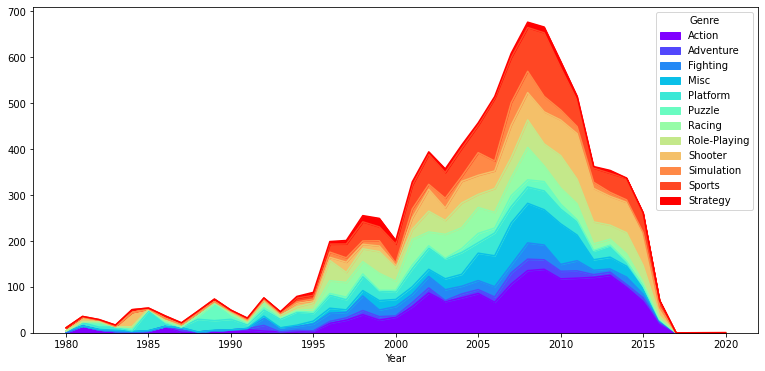

In [56]:
# 장르에 따른 (전 지역) 출고량 시각화
import matplotlib.pyplot as plt

videofull = df[df.Year.notnull()]
videoyears = videofull.groupby(['Year', 'Genre']).Total_Sales.sum()

videoyears.unstack().plot(kind='area', stacked=True, colormap= 'rainbow', figsize=(13, 6) )  
# [그래프 누적] : stacked=True(기본값) -> 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아올림, 각 열의 패턴과 함께 열 전체 합계가 어떻게 변하는지 파악 가능


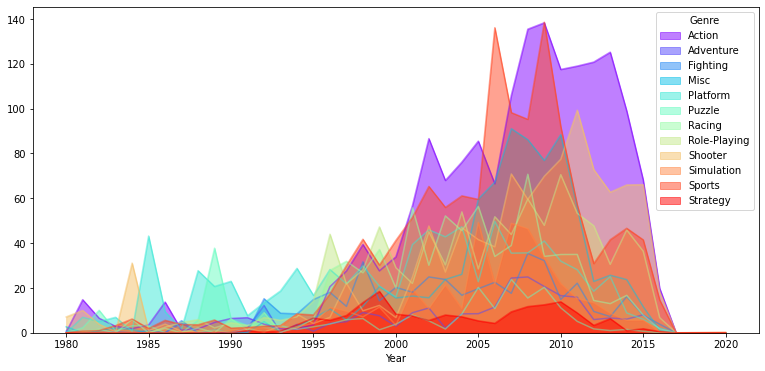

In [57]:
# videoyears.unstack().plot( colormap= 'rainbow', figsize=(13, 6) )  
df.groupby(['Year', 'Genre']).Total_Sales.sum().unstack().plot(kind='area', stacked=False, colormap= 'rainbow', figsize=(13, 6) )  

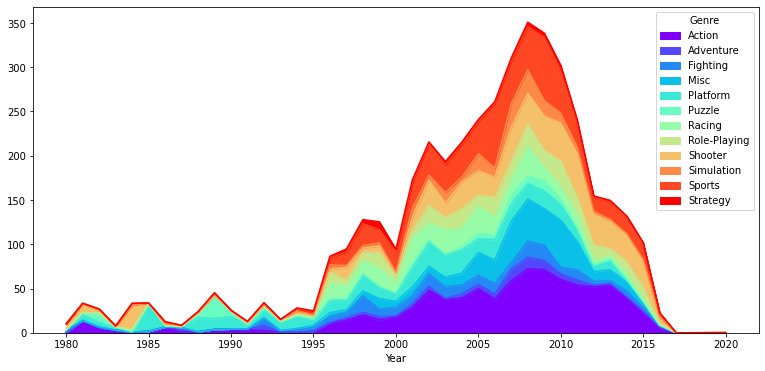

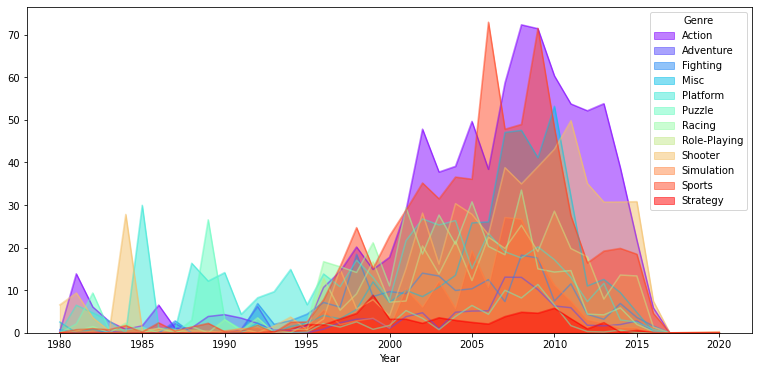

In [58]:
# NA_Sales
df.groupby(['Year','Genre'])['NA_Sales'].sum().unstack().plot(kind='area', stacked=True, colormap= 'rainbow', figsize=(13, 6)) #
df.groupby(['Year','Genre'])['NA_Sales'].sum().unstack().plot(kind='area', stacked=False, colormap= 'rainbow', figsize=(13, 6)) #

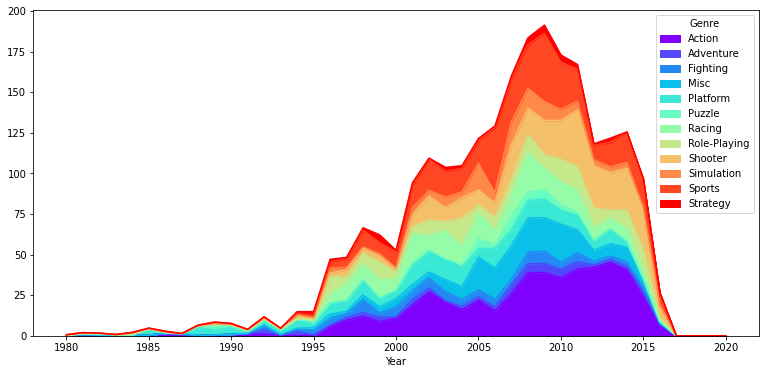

In [59]:
# EU_Sales
# df.groupby(['Year','Genre'])['EU_Sales'].sum().unstack()
df.groupby(['Year','Genre'])['EU_Sales'].sum().unstack().plot(kind='area', stacked=True, colormap= 'rainbow', figsize=(13, 6)) #

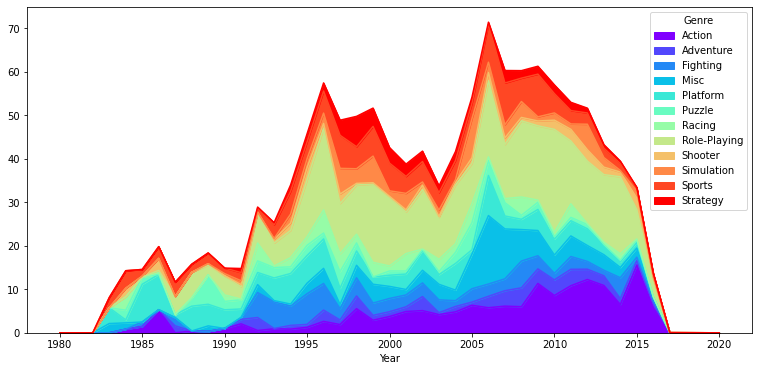

In [60]:
# JP_Sales
df.groupby(['Year','Genre'])['JP_Sales'].sum().unstack().plot(kind='area', stacked=True, colormap= 'rainbow', figsize=(13, 6)) 
# 대중적인 게임 장르가 서구권과 매우 다른 양상을 띈다--> 롤플레잉이 우세 

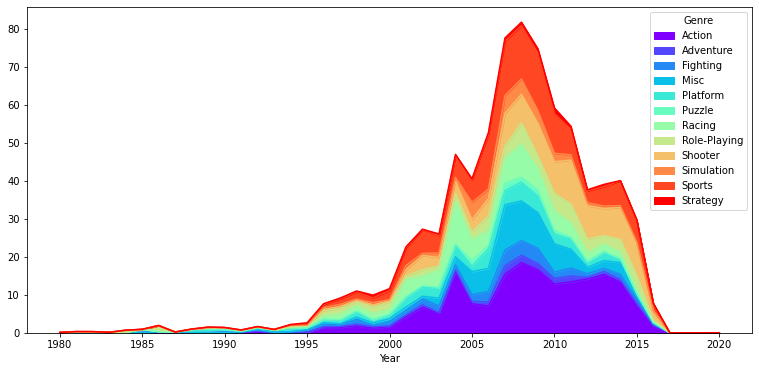

In [61]:
# Other
df.groupby(['Year','Genre'])['Other_Sales'].sum().unstack().plot(kind='area', stacked=True, colormap= 'rainbow', figsize=(13, 6)) #

#### 막대그래프

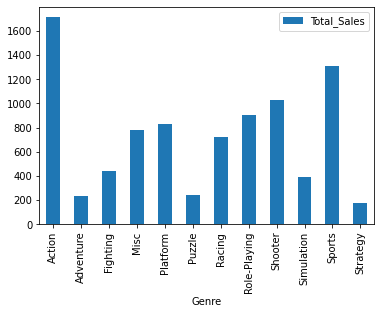

In [62]:
df.groupby(['Genre'])['Total_Sales'].sum().reset_index().plot.bar(x='Genre') # 전 지역에서 엑션과 스포츠 게임이 인기가 많다

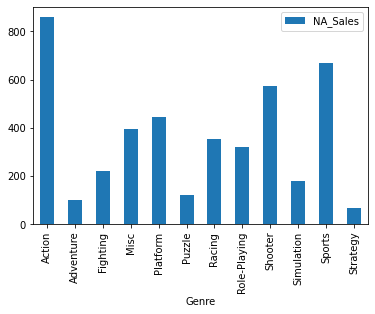

In [63]:
df.groupby(['Genre'])['NA_Sales'].sum().reset_index().plot.bar(x='Genre',y='NA_Sales') # 마찬가지이다.

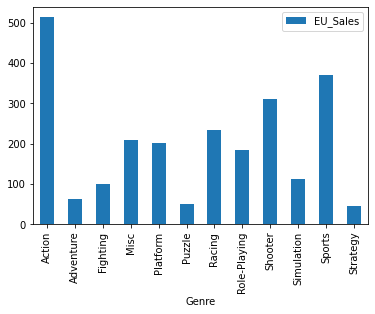

In [64]:
df.groupby(['Genre'])['EU_Sales'].sum().reset_index().plot.bar(x='Genre') # 전체 출고량과 비슷하다

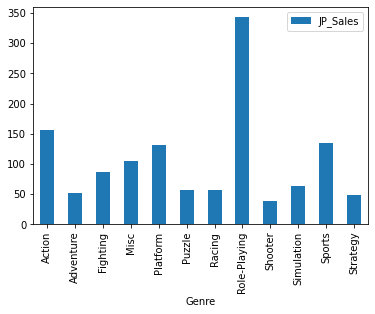

In [65]:
df.groupby(['Genre'])['JP_Sales'].sum().reset_index().plot.bar(x='Genre') # 막대그래프 상으로도 나머지 지역의 장르 선호도의 분포와 차이가 뚜렷하다.

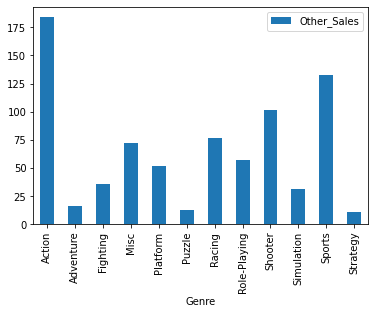

In [66]:
df.groupby(['Genre'])['Other_Sales'].sum().reset_index().plot.bar(x='Genre',y='Other_Sales')

### 가설 검정 

'지역(연속형 변수)에 따라서 선호하는 게임 장르(명목형)가 다를까?'라는 가설에 대한 

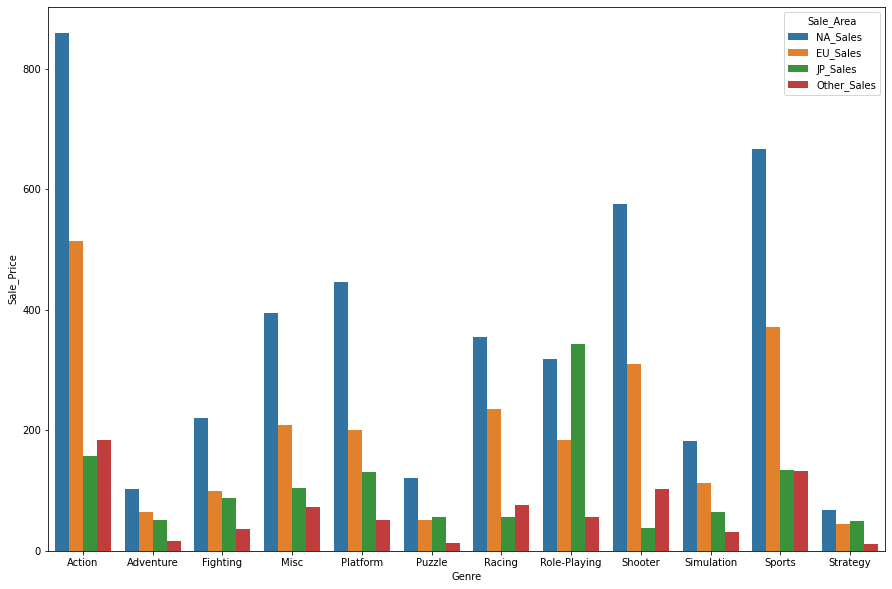

In [67]:
# 시각화
comp_table = df.groupby(['Genre']).sum().reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

In [100]:
df_chi = df.groupby(['Genre']).sum() # 범주로 묶을 수 있으면 연속형도 카이제곱 검정을 할 수 있다. --> groupby로 북미, 유럽, 일본, 나머지 지역으로 묶인 '지역'(범주변수)와 '장르'(범주변수)의 카이제곱 검정이 가능함. 
df_chi = df_chi.iloc[:,1:] #
df_chi

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.33,200.60,130.53,51.44,827.90
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.47,310.22,38.18,101.86,1024.73


In [101]:
# 4개 지역의 장르선호도 분포에 대한 카이제곱 검정 # -> 지역에 따라 선호 장르가 달라지는 가에 대한 검정!
from scipy.stats import chi2_contingency

chi2 = chi2_contingency(df_chi.iloc[:,:4], correction=False)
chi2 # pvalue=0 < 0.05로 유의수준 5%에서 귀무가설 기각, 지역과 장르선호도에는 연관이 있다. 즉, 지역에 따라 장르 선호도가 달라진다고 볼 수 있다. 

(684.0542647534908,
 1.1024369000482674e-122,
 33,
 array([[842.68646936, 468.30850039, 248.71594783, 153.26908243],
        [115.12422069,  63.97830404,  33.97850886,  20.9389664 ],
        [218.19586721, 121.25859745,  64.39974285,  39.68579249],
        [383.56702364, 213.16077114, 113.20845808,  69.76374714],
        [407.27861854, 226.33808186, 120.20685192,  74.07644768],
        [118.42515019,  65.81273879,  34.95276659,  21.53934442],
        [355.45254961, 197.53663613, 104.91056994,  64.65024432],
        [443.49045464, 246.46218647, 130.894648  ,  80.66271089],
        [504.10752358, 280.14907915, 148.78556271,  91.68783456],
        [191.50310499, 106.4245543 ,  56.52146795,  34.83087275],
        [642.15131286, 356.86453893, 189.52870164, 116.79544656],
        [ 84.99770469,  47.23601134,  25.08677361,  15.45951036]]))

In [102]:
round(1.1024369000482674e-122,3)

0.0

In [103]:
# 북미와 유럽지역의 장르선호도 분포에 대한 카이제곱 검정 # 

chi2 = chi2_contingency(df_chi.iloc[:,:2], correction=False)
chi2 # pvalue=0.03 < 0.05이므로 귀무가설 기각 -> 북미지역과 유럽권의 게임장르선호도에는 차이가 있다. 

(21.090120545765387,
 0.03244930761668891,
 11,
 array([[882.15020681, 490.23979319],
        [106.34859749,  59.10140251],
        [205.85154637, 114.39845363],
        [387.52156215, 215.35843785],
        [415.19340937, 230.73659063],
        [110.59097128,  61.45902872],
        [379.06252593, 210.65747407],
        [322.58110398, 179.26889602],
        [568.66449512, 316.02550488],
        [189.24843804, 105.17156196],
        [667.35753628, 370.87246372],
        [ 72.40960718,  40.24039282]]))

In [104]:
chi2 = chi2_contingency(df_chi[['NA_Sales','Total_Sales']], correction=False)
chi2 # 귀무가설 기각 -> 세계 장르 선호도와 북미지역의 장르 선호도에는 차이가 있다. 

(39.589313940351275,
 4.204628383906246e-05,
 11,
 array([[ 847.98313858, 1723.74686142],
        [ 110.72749385,  225.08250615],
        [ 218.90615495,  444.98384505],
        [ 387.24782051,  787.18217949],
        [ 419.82539828,  853.40460172],
        [ 119.46540692,  242.84459308],
        [ 355.20440949,  722.04559051],
        [ 402.36276145,  817.90723855],
        [ 527.30832366, 1071.89167634],
        [ 188.18167421,  382.52832579],
        [ 650.43046477, 1322.16953523],
        [  79.33695332,  161.27304668]]))

In [105]:
chi2 = chi2_contingency(df_chi[['EU_Sales','Total_Sales']], correction=False)
chi2 #pvalue= 0.0003 < 0.05 귀무가설 기각 -> 세계 장르 선호도와 유럽지역의 장르 선호도에는 차이가 있다. 

(34.088240288343215,
 0.0003498668604713975,
 11,
 array([[ 478.04087948, 1748.57912052],
        [  63.90996623,  233.77003377],
        [ 116.67304504,  426.76695496],
        [ 212.08499106,  775.76500894],
        [ 220.81228254,  807.68771746],
        [  62.51875224,  228.68124776],
        [ 205.58407136,  751.98592864],
        [ 232.85658886,  851.74341114],
        [ 286.60511092, 1048.34488908],
        [ 107.83411293,  394.43588707],
        [ 359.89288998, 1316.41711002],
        [  46.71730936,  170.88269064]]))

In [106]:
chi2 = chi2_contingency(df_chi[['JP_Sales','Total_Sales']], correction=False)
chi2  # pvalue=0 < 0.05 귀무가설 기각 -> 세계 장르 선호도와 일본의 게임 장르 선호도에는 차이가 있다. 
# 그러나, 카이제곱통계량의 값이 약 439로 미국이나 유럽에 비해 기대분포와의 거리가 매우 멀다

(439.2759219001665,
 2.755628188009453e-87,
 11,
 array([[ 237.03691811, 1632.54308189],
        [  36.24690279,  249.64309721],
        [  67.28289333,  463.39710667],
        [ 112.06377431,  771.81622569],
        [ 121.5156845 ,  836.9143155 ],
        [  37.65169373,  259.31830627],
        [  98.74995689,  680.12004311],
        [ 157.77780163, 1086.66219837],
        [ 134.76230524,  928.14769476],
        [  57.41132086,  395.40867914],
        [ 182.58478683, 1257.51521317],
        [  28.10596177,  193.57403823]]))

In [107]:
chi2 = chi2_contingency(df_chi[['Other_Sales','Total_Sales']], correction=False)
chi2 # pvalue=0.0016 < 0.05 귀무가설 기각 -> 나머지 지역의 게임 장르 선호도와  세계 장르 선호도에는 차이가 있다. 

(29.898088332898602,
 0.0016440375083718994,
 11,
 array([[ 155.79209337, 1741.17790663],
        [  20.59083362,  230.12916638],
        [  39.39540913,  440.29459087],
        [  69.99996461,  782.34003539],
        [  72.21738846,  807.12261154],
        [  20.7920443 ,  232.3779557 ],
        [  65.62424821,  733.43575179],
        [  78.69719371,  879.54280629],
        [  92.52324205, 1034.06675795],
        [  34.54253598,  386.05746402],
        [ 118.07289241, 1319.61710759],
        [  15.11215417,  168.89784583]]))

1번 문항 결론 : 지역별로 선호하는 장르는 다른 것으로 보여진다. 

# 2. 연도별 게임 트렌드 분석

#### 게임 출시가 가장 많았던 연도는?

In [108]:
# df.groupby(by=['Year'])['Name'].count()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

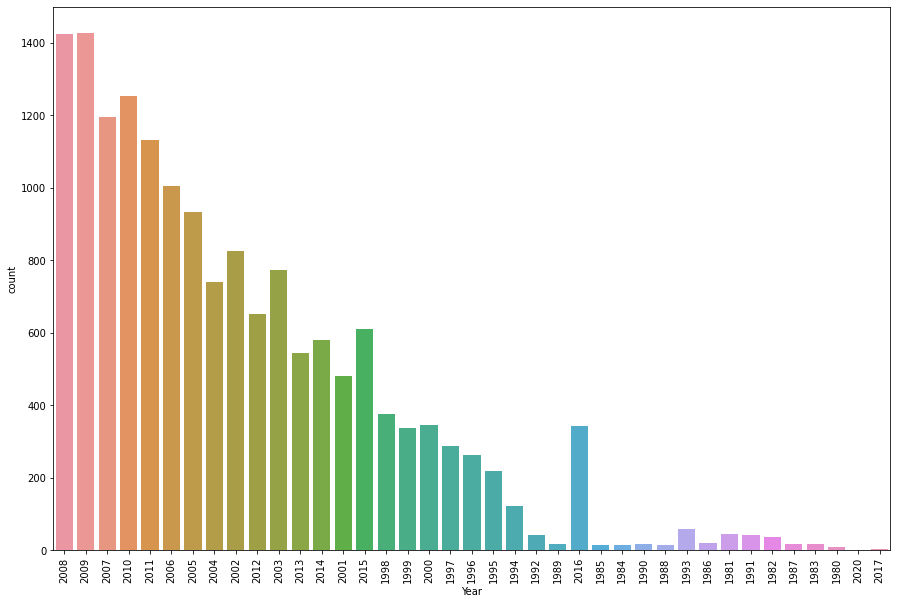

In [109]:
# 판매량이 가장 높은 연도
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Total_Sales'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

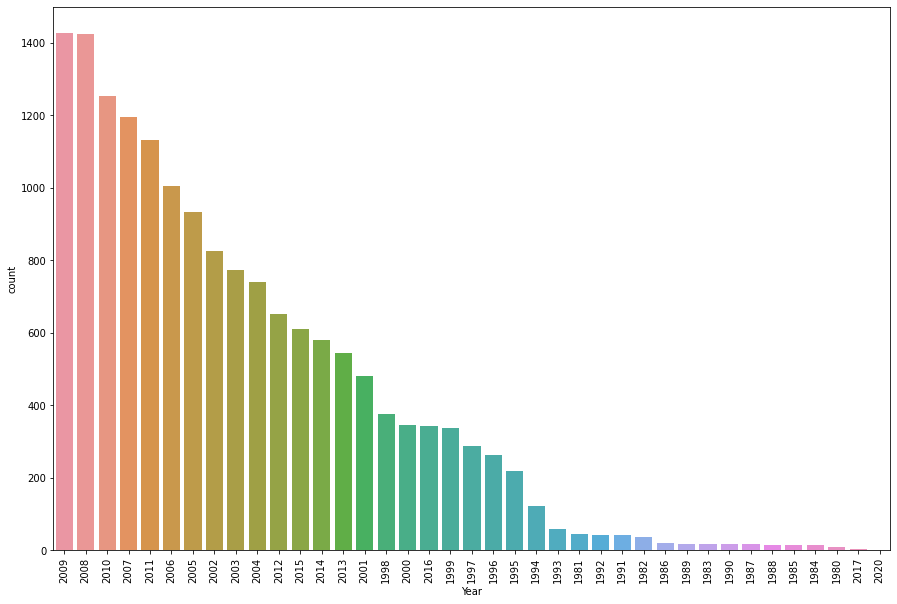

In [110]:
# 게임 출시가 가장 많은 년도
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

#### 연도별 인기있는 장르 추이

시각화

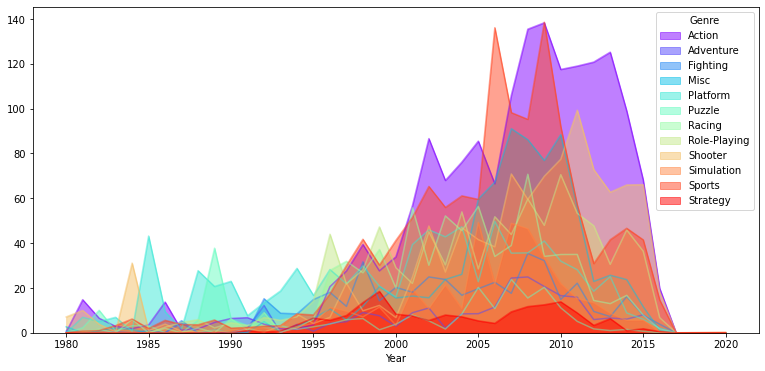

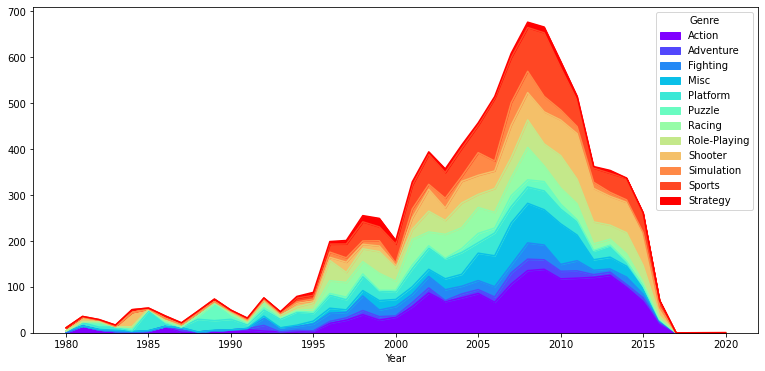

In [111]:
df.groupby(['Year', 'Genre']).Total_Sales.sum().unstack().plot(kind='area', stacked=False, colormap= 'rainbow', figsize=(13, 6) )  
df.groupby(['Year', 'Genre']).Total_Sales.sum().unstack().plot(kind='area', stacked=True, colormap= 'rainbow', figsize=(13, 6) )  


In [112]:
df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

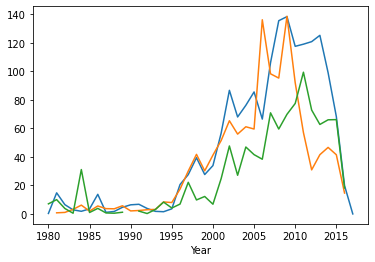

In [113]:
Genre_Y = df.groupby(['Year', 'Genre']).Total_Sales.sum().unstack()
Genre_Y['Action'].plot() # 2015년도까지 전반적으로 매우 우세한 출고량을 가짐.
# Genre_Y['Adventure'].plot(colormap= 'rainbow')
# Genre_Y['Misc'].plot()
# Genre_Y['Platform'].plot()
Genre_Y['Sports'].plot() # Sports -> 2005~2010년에 매우 가파르게 상승함
# Genre_Y['Simulation'].plot() # 마찬가지로 2005~2010년에 상승했다 떨어짐. 
# Genre_Y['Racing'].plot() # 1995~2010년까지 지속적인 매니아층 이 있는 것으로 보임
# Genre_Y['Role-Playing'].plot() # 1995~2015 지속적인 출고량 
# Genre_Y['Puzzle'].plot() # 1980년대 후와 2000년대 반짝 
# Genre_Y['Strategy'].plot() # 눈에 띄는 판매량을 보이지 못함
# Genre_Y['Fighting'].plot()
Genre_Y['Shooter'].plot() # 2005년부터 매우 가파른 상승세를 보임. 



연도별 인기 장르 

In [124]:
# df.Year.value_counts()
for i in range(len(Genre_Y)):
    print(Genre_Y.index[i],'년도에 가장 인기 있는 장르: ',Genre_Y.columns[Genre_Y.iloc[i, :].rank(ascending = False) == 1][0])
    # print(Genre_Y.index[i], Genre_Y.columns[Genre_Y.iloc[i, :].rank(ascending = False) == 1][0])


1980 년도에 가장 인기 있는 장르:  Shooter
1981 년도에 가장 인기 있는 장르:  Action
1982 년도에 가장 인기 있는 장르:  Puzzle
1983 년도에 가장 인기 있는 장르:  Platform
1984 년도에 가장 인기 있는 장르:  Shooter
1985 년도에 가장 인기 있는 장르:  Platform
1986 년도에 가장 인기 있는 장르:  Action
1987 년도에 가장 인기 있는 장르:  Fighting
1988 년도에 가장 인기 있는 장르:  Platform
1989 년도에 가장 인기 있는 장르:  Puzzle
1990 년도에 가장 인기 있는 장르:  Platform
1991 년도에 가장 인기 있는 장르:  Platform
1992 년도에 가장 인기 있는 장르:  Fighting
1993 년도에 가장 인기 있는 장르:  Platform
1994 년도에 가장 인기 있는 장르:  Platform
1995 년도에 가장 인기 있는 장르:  Platform
1996 년도에 가장 인기 있는 장르:  Role-Playing
1997 년도에 가장 인기 있는 장르:  Racing
1998 년도에 가장 인기 있는 장르:  Sports
1999 년도에 가장 인기 있는 장르:  Role-Playing
2000 년도에 가장 인기 있는 장르:  Sports
2001 년도에 가장 인기 있는 장르:  Action
2002 년도에 가장 인기 있는 장르:  Action
2003 년도에 가장 인기 있는 장르:  Action
2004 년도에 가장 인기 있는 장르:  Action
2005 년도에 가장 인기 있는 장르:  Action
2006 년도에 가장 인기 있는 장르:  Sports
2007 년도에 가장 인기 있는 장르:  Action
2008 년도에 가장 인기 있는 장르:  Action
2009 년도에 가장 인기 있는 장르:  Sports
2010 년도에 가장 인기 있는 장르:  Action
2011 년도에 가장 인기 있는 장르:  Action
2012 년

#### 연도별 인기있는 플랫폼 추이

In [115]:
Platform_Y = df.groupby(['Year', 'Platform']).Total_Sales.sum().unstack()
# Platform_Y
# 휴대폰처럼 항상 업그레이드 되는 게임기의 특성상 플랫폼은 시기별로 인기 있는 플랫폼이 다르다. 

In [116]:
Platform_Y.columns[Platform_Y.iloc[0,:].rank(ascending = True) == 1.00]
Platform_Y.columns[Platform_Y.iloc[-1,:].rank() == 1][0]

for i in range(len(Platform_Y)):
    print(Platform_Y.index[i],'년도에 가장 인기 있는 Platform: ',Platform_Y.columns[Platform_Y.iloc[i, :].rank(ascending = False) == 1][0])

1980 년도에 가장 인기 있는 Platform:  2600
1981 년도에 가장 인기 있는 Platform:  2600
1982 년도에 가장 인기 있는 Platform:  2600
1983 년도에 가장 인기 있는 Platform:  NES
1984 년도에 가장 인기 있는 Platform:  NES
1985 년도에 가장 인기 있는 Platform:  NES
1986 년도에 가장 인기 있는 Platform:  NES
1987 년도에 가장 인기 있는 Platform:  NES
1988 년도에 가장 인기 있는 Platform:  NES
1989 년도에 가장 인기 있는 Platform:  GB
1990 년도에 가장 인기 있는 Platform:  SNES
1991 년도에 가장 인기 있는 Platform:  SNES
1992 년도에 가장 인기 있는 Platform:  SNES
1993 년도에 가장 인기 있는 Platform:  SNES
1994 년도에 가장 인기 있는 Platform:  SNES
1995 년도에 가장 인기 있는 Platform:  PS
1996 년도에 가장 인기 있는 Platform:  PS
1997 년도에 가장 인기 있는 Platform:  PS
1998 년도에 가장 인기 있는 Platform:  PS
1999 년도에 가장 인기 있는 Platform:  PS
2000 년도에 가장 인기 있는 Platform:  PS
2001 년도에 가장 인기 있는 Platform:  PS2
2002 년도에 가장 인기 있는 Platform:  PS2
2003 년도에 가장 인기 있는 Platform:  PS2
2004 년도에 가장 인기 있는 Platform:  PS2
2005 년도에 가장 인기 있는 Platform:  PS2
2006 년도에 가장 인기 있는 Platform:  Wii
2007 년도에 가장 인기 있는 Platform:  Wii
2008 년도에 가장 인기 있는 Platform:  Wii
2009 년도에 가장 인기 있는 Platform:  Wii
2010 년도에 

시각화

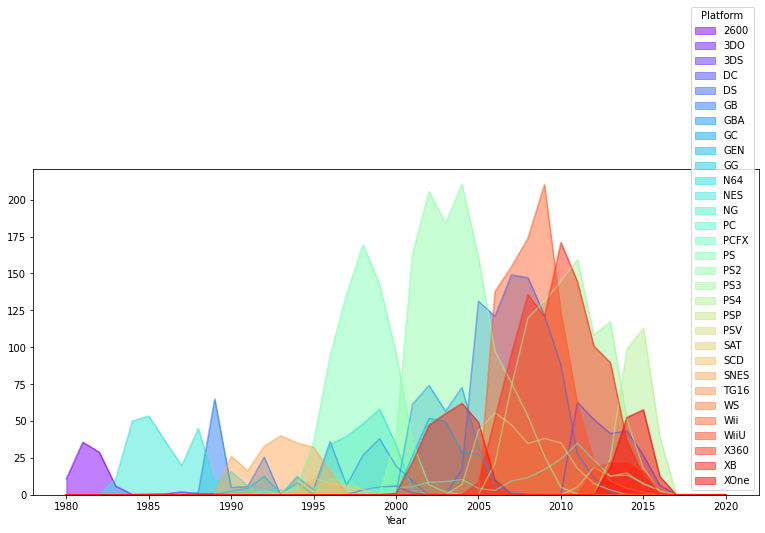

In [117]:
# 플렛폼 연도별 판매 추이
df.groupby(['Year', 'Platform']).Total_Sales.sum().unstack().plot(kind='area', stacked=False, colormap= 'rainbow', figsize=(13, 6) )  
# 플렛폼이 너무 세분화되어 있어서 알아보기가 힘들다 -> 3범주로 묶음

### 게임 대기업 3사 비교

In [118]:
# df.groupby(by=)
df[df.Publisher == 'Nintendo']['Platform'].value_counts()
df[df.Publisher == 'Sony Computer Entertainment']['Platform'].value_counts()
df[df.Publisher == 'Microsoft Game Studios']['Platform'].value_counts()

X360    71
XB      68
PC      29
XOne    20
WiiU     1
Name: Platform, dtype: int64

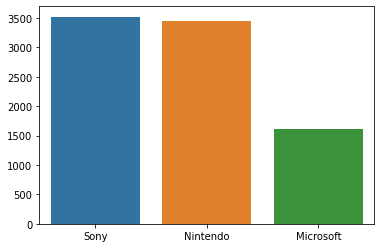

In [119]:
Sony = df[(df.Platform == 'PSP') | (df.Platform == 'PS') | (df.Platform == 'PS2') | (df.Platform == 'PS3') |(df.Platform == 'PS4') | (df.Platform == 'PSV') ]
Nintendo = df[(df.Platform == '3DS') | (df.Platform == 'DS') | (df.Platform == 'N64') | (df.Platform == 'Wii') | (df.Platform == 'WiiU') |(df.Platform == 'NES') | (df.Platform == 'GB') 
                      | (df.Platform == 'GBA') | (df.Platform == 'GC') |(df.Platform == 'SNES')]
Microsoft = df[(df.Platform == 'X360') | (df.Platform == 'XB') | (df.Platform == 'PC') | (df.Platform == 'XOne')]

#
PSsum = Sony['Total_Sales'].sum()
Nintendosum = Nintendo['Total_Sales'].sum()
Microsoftsum = Microsoft['Total_Sales'].sum()

sns.barplot(x=['Sony', 'Nintendo', 'Microsoft'], y=[PSsum, Nintendosum, Microsoftsum]) 


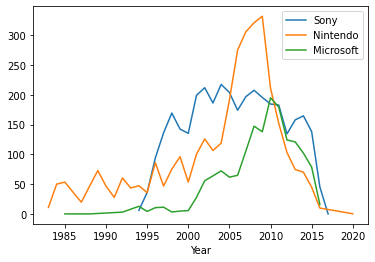

In [121]:
Sony.groupby(['Year']).Total_Sales.sum().plot()
Nintendo.groupby(['Year']).Total_Sales.sum().plot()
Microsoft.groupby(['Year']).Total_Sales.sum().plot()
plt.legend(('Sony', 'Nintendo', 'Microsoft'))

#### 3사와 나머지 회사 판매량 비교

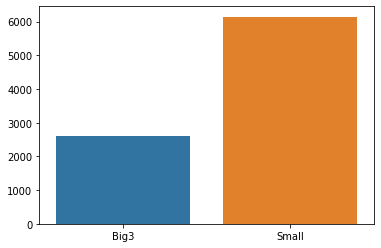

In [122]:
# 3사와 나머지 회사 판매량 비교
Big3_Publisher = df[(df.Publisher == 'Nintendo' )| (df.Publisher == 'Sony Computer Entertainment') |(df.Publisher == 'Microsoft Game Studios')]
Small_Publisher = df[(df.Publisher != 'Nintendo' )& (df.Publisher != 'Sony Computer Entertainment') &(df.Publisher != 'Microsoft Game Studios')]

Big3_Publisher_sum = Big3_Publisher['Total_Sales'].sum()
Small_Publisher_sum = Small_Publisher['Total_Sales'].sum()

sns.barplot(x=['Big3', 'Small'], y=[Big3_Publisher_sum, Small_Publisher_sum]) 

### Handheld Consoles 게임기와 Home Consoles게임 분류

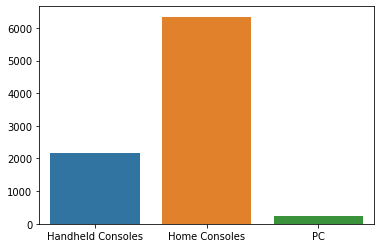

In [125]:
import seaborn as sns

video = df
# Handheld Consoles 게임기와 집에서만 할 수 있는 Home Consoles게임을 분류
hands = video[(video.Platform == 'GB') | (video.Platform == 'DS') | (video.Platform == 'GBA') | (video.Platform == '3DS') |
             (video.Platform == 'PSP') | (video.Platform == 'GC') | (video.Platform == 'GC') | (video.Platform == 'PSV') | 
             (video.Platform == 'SCD') | (video.Platform == 'WS') | (video.Platform == 'GG')]

homes = video[(video.Platform == 'Wii') | (video.Platform == 'NES') | (video.Platform == 'X360') | (video.Platform == 'PS3') |
             (video.Platform == 'PS2') | (video.Platform == 'SNES') | (video.Platform == 'PS4') | (video.Platform == 'N64') |
             (video.Platform == 'PS') | (video.Platform == 'XB') | (video.Platform == '2600') | (video.Platform == 'XOne') |
             (video.Platform == 'WiiU') | (video.Platform == 'GEN') | (video.Platform == 'DC') | (video.Platform == 'SAT') |
             (video.Platform == 'NG') | (video.Platform == 'TG16') | (video.Platform == '3DO') | (video.Platform == 'PCFX')]

PC = df[df.Platform =='PC']

homesum = homes['Total_Sales'].sum()
handsum = hands['Total_Sales'].sum()
PCsum = PC['Total_Sales'].sum()

sns.barplot(x=['Handheld Consoles', 'Home Consoles', 'PC'], y=[handsum, homesum, PCsum]) 
# Handheld Consoles 게임기보다 집에서만 할 수 있는 Home Consoles게임의 출고량이 3개 가까이 된다.


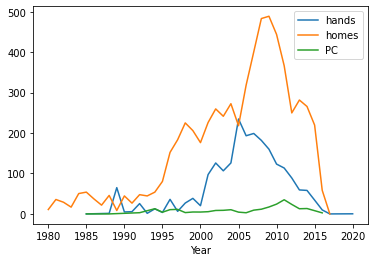

In [126]:
 
# 연도별 hands게임기와 home게임의 연도별 판매량
hands.groupby(['Year']).Total_Sales.sum().plot()
homes.groupby(['Year']).Total_Sales.sum().plot()
PC.groupby(['Year']).Total_Sales.sum().plot()

plt.legend(('hands', 'homes', 'PC'))
# 1980후반을 제외한 대부분의 연도에서 home게임이 더 인기가 많다.

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

###  전체 판매량이 가장 높은 게임


In [127]:
# 전체 판매량이 가장 높은 게임
df[df.Total_Sales == df.Total_Sales.max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


### 세계 판매량 top10 게임 

In [128]:
# pd.reset_option('display.float_format')
pd.options.display.float_format = '{:.2f}'.format

In [129]:
# 세계 판매량 10위인 게임 # 

# 순위를 매긴 데이터프레임 생성
df_rank = df
df_rank['NA_rank'] = df.iloc[:,5].rank(ascending=False,method='min').astype(int)
df_rank['EU_rank'] = df.iloc[:,6].rank(ascending=False,method='min').astype(int)
df_rank['JP_rank'] = df.iloc[:,7].rank(ascending=False,method='min').astype(int)
df_rank['OT_rank'] = df.iloc[:,8].rank(ascending=False,method='min').astype(int)
df_rank['Total_rank'] = df.iloc[:,9].rank(ascending=False,method='min').astype(int)

In [130]:
df[df.Total_rank == 1] # Wii Sports

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,NA_rank,EU_rank,JP_rank,OT_rank,Total_rank
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,1,24,2,1


In [131]:
df[df.NA_rank == 1] # Wii Sports

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,NA_rank,EU_rank,JP_rank,OT_rank,Total_rank
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,1,24,2,1


In [132]:
df[df.EU_rank == 1] # Wii Sports

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,NA_rank,EU_rank,JP_rank,OT_rank,Total_rank
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,1,24,2,1


In [133]:
df[df.JP_rank == 1] # Pokemon Red/Pokemon Blue	

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,NA_rank,EU_rank,JP_rank,OT_rank,Total_rank
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,12,9,1,78,5


In [134]:
df[df.OT_rank == 1] # Grand Theft Auto: San Andreas	

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,NA_rank,EU_rank,JP_rank,OT_rank,Total_rank
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,18,1391,698,1,18


In [135]:
# 세계 판매량 top10 게임 
df_rank.sort_values(by='Total_rank').head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,NA_rank,EU_rank,JP_rank,OT_rank,Total_rank
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,1,24,2,1
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2,49,3,116,2
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,5,2,23,5,3
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,6,3,32,6,4
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,12,9,1,78,5
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,4,117,14,191,6
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,11,7,4,8,7
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,9,8,42,9,8
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,8,13,11,14,9
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,3,806,1071,243,10


### 세계 총 판매량 top10 Publisher

In [136]:
# df.groupby(['Publisher'])['Total_Sales'].sum() # 회사별 총 판매량
# # .rank(ascending=False)

In [137]:
# 세계 총 판매량 top10 Publisher
top10_Publisher = df.groupby(['Publisher'])['Total_Sales'].sum().sort_values(ascending=False).head(10)
top10_Publisher

Publisher
Nintendo                       1759.38
Electronic Arts                1087.18
Activision                      719.36
Sony Computer Entertainment     603.58
Ubisoft                         472.70
Take-Two Interactive            398.57
THQ                             340.18
Konami Digital Entertainment    277.89
Sega                            269.56
Namco Bandai Games              252.78
Name: Total_Sales, dtype: float64

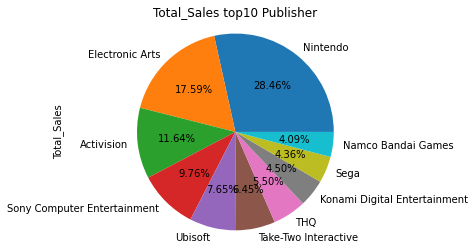

In [138]:
# 게임 회사 별 판매량 비율 #
top10_Publisher.plot.pie(autopct='%.2f%%');
plt.title("Total_Sales top10 Publisher")
plt.axis('equal')
plt.show();

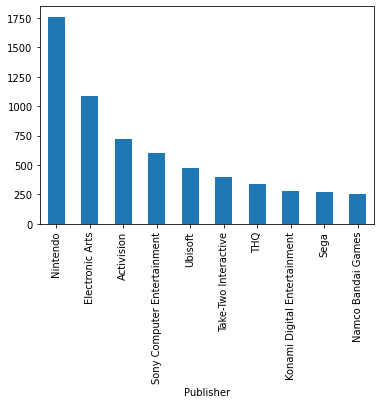

In [139]:
# 10순위 회사의 세계매출량 막대그래프
top10_Publisher.plot.bar() # 닌텐도 1위 -> 약 17억개 판매

# 추가 시각화

### 게임 장르별 판매량

In [140]:
df.Genre.value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1279
Adventure       1268
Racing          1219
Platform         872
Simulation       846
Fighting         835
Strategy         668
Puzzle           566
Name: Genre, dtype: int64

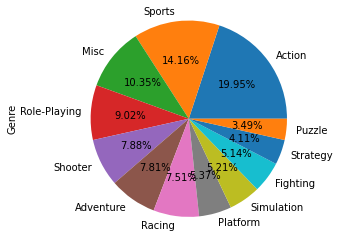

In [141]:
# 게임 장르별 판매량 비율 #
df_Genre = df.Genre.value_counts()
df_Genre.plot.pie(autopct='%.2f%%');
# plt.title("장르 선호도 비율")
plt.axis('equal')
plt.show();

### 어떤 장르의 게임이 가장 많이 만들어 졌는가?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

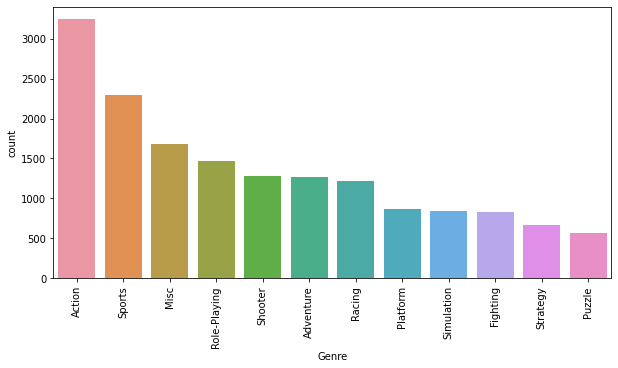

In [142]:
# 어떤 장르의 게임이 가장 많이 만들어 졌는가?
plt.figure(figsize=(10, 5))
sns.countplot(x="Genre", data=df, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

### 게임 플렛폼 비율

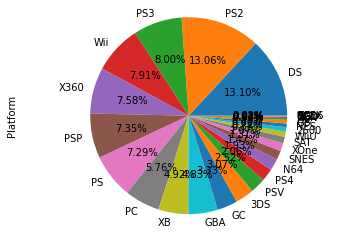

In [143]:
# 게임 플렛폼 별 판매량 비율 #
df_Platform= df.Platform.value_counts()
df_Platform.plot.pie(autopct='%.2f%%');
# plt.title("장르 선호도 비율")
plt.axis('equal')
plt.show();

### 게임 회사 별 판매량 비율

In [144]:
df.Publisher.value_counts()[:10]

Electronic Arts                 1332
Activision                       963
Namco Bandai Games               923
Ubisoft                          913
Konami Digital Entertainment     821
THQ                              711
Nintendo                         691
Sony Computer Entertainment      679
Sega                             631
Take-Two Interactive             411
Name: Publisher, dtype: int64

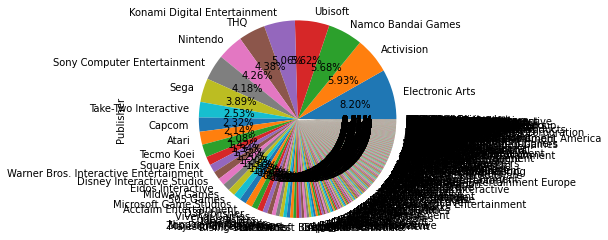

In [145]:
# 게임 회사 별 판매량 비율 #
df_Publisher= df.Publisher.value_counts()
df_Publisher.plot.pie(autopct='%.2f%%');
# plt.title("")
plt.axis('equal')
plt.show();

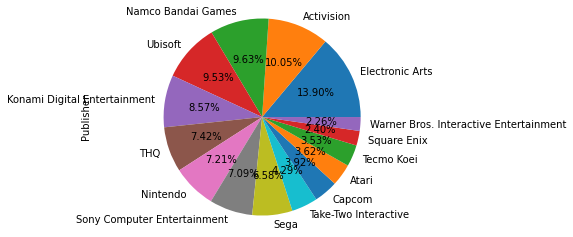

In [146]:
df_Publisher= df.Publisher.value_counts()[:15] # 상위 15위 
df_Publisher.plot.pie(autopct='%.2f%%');
# plt.title("")
plt.axis('equal')
plt.show();

# 장르별 플렛폼 연관성

In [147]:
df.groupby(['Genre','Platform'])

In [148]:
pd.crosstab(df.Genre,df.Platform)

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,55,0,180,3,335,6,162,98,3,0,36,13,0,160,0,153,344,369,121,216,141,3,0,12,0,0,229,63,318,152,68
Adventure,1,1,36,11,237,5,35,20,2,0,4,1,0,65,0,66,195,72,19,213,84,26,0,4,1,0,83,3,47,26,11
Fighting,1,0,14,12,36,0,23,42,5,0,29,4,11,5,0,108,146,76,17,73,16,31,0,25,0,0,41,5,64,44,7
Misc,5,0,53,0,388,8,86,35,1,0,17,2,0,22,0,76,217,121,15,104,24,15,2,17,0,0,270,21,122,45,15
Platform,9,0,28,2,89,18,139,73,7,1,30,28,0,11,0,63,101,35,11,35,10,5,1,26,0,0,57,16,24,49,4
Puzzle,8,1,19,0,235,15,39,11,0,0,12,14,0,25,0,32,18,2,1,43,3,5,0,13,0,0,53,4,6,7,0
Racing,4,0,10,6,66,2,64,60,1,0,56,4,0,56,0,143,212,90,17,65,11,8,1,9,0,0,91,3,100,121,19
Role-Playing,0,0,84,4,196,21,72,25,3,0,7,11,0,103,1,96,182,117,47,190,82,17,1,50,0,4,35,6,75,23,13
Shooter,22,0,6,3,42,1,40,48,1,0,24,7,0,145,0,95,158,155,34,37,5,22,0,10,1,0,60,10,197,123,33


In [149]:
chi2 = chi2_contingency(pd.crosstab(df.Genre,df.Platform), correction=False)
chi2[:2] # 귀무가설 기각, 장르별 플렛폼은 연관이 있다. 즉, 플렛폼에 따라 선호되는 게임 장르가 다르다.

(5821.233030167341, 0.0)